# Project(1) 캘리포니아 주택 가격 분석

## 1.데이터 셋
+ [데이터] scikit-learn에서 제공하는 1990년대 캘리포니아 주택 가격에 대한 데이터를 제공함
+  캘리포니아 주택 가격에 영향을 미치는 요인은 무엇인지 파악하고,예측하는 회귀모델을 학습시키고자 함.
+ 총 20,640개의 관측값과 8개의 독립변수(feature), 1개의 종속변수(target)으로 구성됨

<br>

## 2. 데이터 확인 및 전처리

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame = True)
df = data.frame
df.head(3)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [3]:
#데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


* 캘리포니아 주택 가격 데이터를 확인한 결과, 관측값은 20,640 개, 변수는 9개로 나타남.
* 주택 가격에 영향을 미치는 특성(feature)은 다음과 같음
  * MedInc	지역 중위 소득 (10,000 USD)
  * HouseAge	주택 연식 (건축 후 경과된 연도 수)
  * AveRooms	가구당 평균 방 개수
  * AveBedrms	가구당 평균 침실 개수
  * Population	지역 내 인구 수
  * AveOccup	가구당 평균 거주 인원 수
  * Latitude	위도
  * Longitude	경도
  * MedHouseVal	주택 중위 가격 (100,000 USD)
* 종속변수( target) 는 Medhouseval(주택중위가격)임

<br>

In [4]:
# 데이터 전처리 : 결측값 확인
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

* 결측값은 없었음.

<br>

## 3.데이터 분할 : 학습데이터, 평가데이터 

* 학습 데이터와 평가 데이터를 7:3 비율로 분할함
  

In [5]:
a,b = [10,20]
print(a)
print(b)

10
20


In [6]:
# 학습/평가 데이터 분할(7:3비율)
X = data.data      #feature
y = data.target    #target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)       
# 0.3해서 비율나누고 난수(랜덤)로 시드값 형성하는거임..!


In [7]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [8]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
17505    2.37500
13512    0.67300
10842    2.18400
16559    1.19400
5786     2.09800
Name: MedHouseVal, Length: 6192, dtype: float64

In [9]:
20640*0.3            # 7:3으로 잘 분할됨..!

6192.0

<br>

## 4. 데이터 탐색

In [10]:
# 요약통계량 확인

df_train = pd.concat([X_train,y_train],axis = 1)
df_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02,1.93800
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09,1.69700
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14,2.59800
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00,1.36100
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45,5.00001


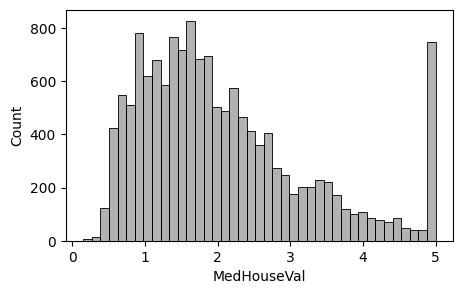

In [11]:
# 중위 주택 가격에 대한 분포

plt.figure(figsize=(5,3))
sns.histplot(df_train['MedHouseVal'],color = 'black',alpha=0.3)
plt.show()

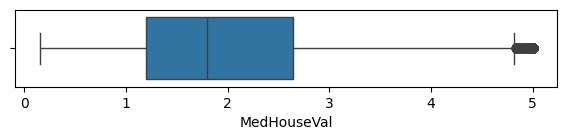

In [12]:
# 상자그림으로 보자아

plt.figure(figsize=(7,1))
sns.boxplot(x ='MedHouseVal',data = df_train)
plt.show()

* 중위 주택 가격의 평균은 약 20만 달러로 나타남.(MedHouseVal)
* 표준편차는 11만 달러로 나타남. 중위주택가격의 최소값은 1만 5천달러, 최대값은 50만달러로 나타남.
* 히스토 그램과 상자그림을 살펴보면 중위주택 가격이 매우 높은 이상값이 많이 존재함을 알 수있음.

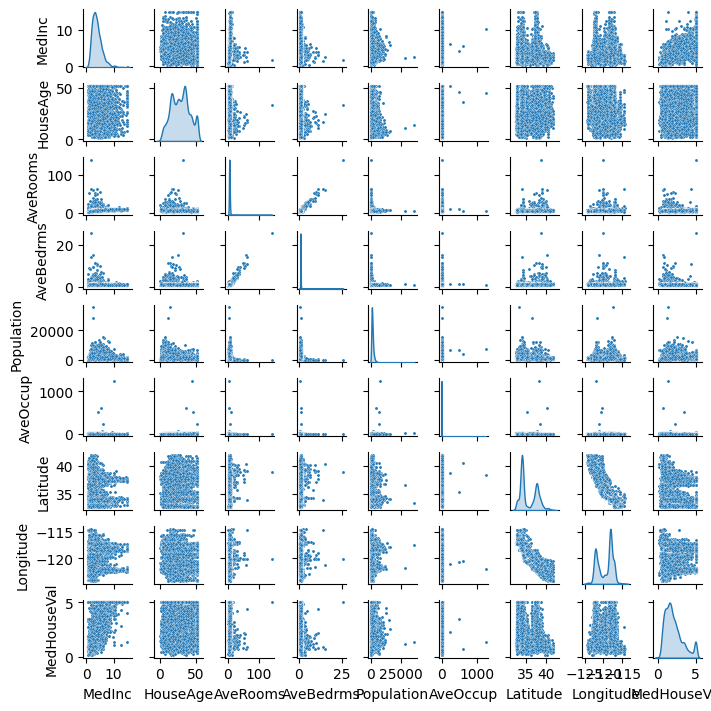

In [13]:
#산점도

sns.pairplot(df_train,height=0.8,plot_kws={'s':5},diag_kind='kde')
plt.show()

In [14]:
#상관계수

corr_train = df_train.corr()
corr_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.117506,0.323255,-0.071110,0.003661,0.024554,-0.075892,-0.019019,0.688229
HouseAge,-0.117506,1.000000,-0.157529,-0.087350,-0.291589,0.017437,0.003461,-0.101083,0.106549
AveRooms,0.323255,-0.157529,1.000000,0.845543,-0.075529,-0.004659,0.111067,-0.028503,0.152106
AveBedrms,-0.071110,-0.087350,0.845543,1.000000,-0.071975,-0.005809,0.073138,0.017361,-0.048455
Population,0.003661,-0.291589,-0.075529,-0.071975,1.000000,0.075019,-0.101665,0.092163,-0.024316
AveOccup,0.024554,0.017437,-0.004659,-0.005809,0.075019,1.000000,0.007654,-0.002295,-0.020960
Latitude,-0.075892,0.003461,0.111067,0.073138,-0.101665,0.007654,1.000000,-0.923408,-0.141528
Longitude,-0.019019,-0.101083,-0.028503,0.017361,0.092163,-0.002295,-0.923408,1.000000,-0.049347
MedHouseVal,0.688229,0.106549,0.152106,-0.048455,-0.024316,-0.020960,-0.141528,-0.049347,1.000000


In [15]:
upp_mat = np.triu(corr_train)

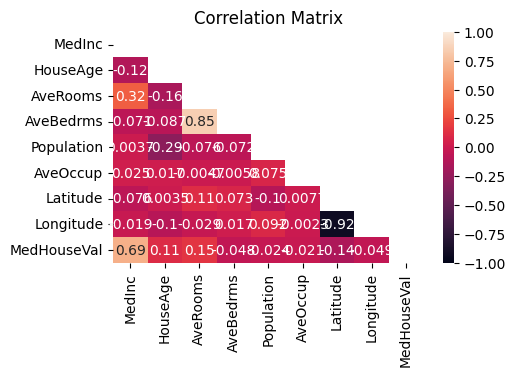

In [16]:
plt.figure(figsize = (5,3))
sns.heatmap(corr_train,annot=True,mask=upp_mat,vmin=-1,vmax=1)
plt.title('Correlation Matrix')
plt.show()

*  중위 주택 가격은 지역 중위 소득과 강한 양의 상관관계가 존재함
*  또한 주택연식,가구당 평균 방 개수, 위도 간에도 약한 양의 상관관계가잇음
*  따라서 중위 주택 가격을 예측하는 특성(feature)으로 해당 변수를 선택함.

<br>

## 5. 회귀모델 학습

In [17]:
# 상관관계가 존재하는 특성(feature) 선택
# scikit-Learn에서 입력 데이터(feature)선택
features = ['MedInc','HouseAge','AveRooms','Latitude']
target = 'MedHouseVal'

X_train = df_train[features]                   # 2차원 배열


In [18]:
# 선형 회귀모델 생성 및 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train); # ; 찍으면 결과 안나옴.!



#회귀계수(regression coefficient)

pd.DataFrame({'Features':features, 'Coefficient': model.coef_})

,Features,Coefficient
0,MedInc,0.435658
1,HouseAge,0.016937
2,AveRooms,-0.019505
3,Latitude,-0.045071


* (1)회귀계수를 살펴보면 중위주택 가격은  지역 중위 소득이 1만 달러 증가하면 중위 주택 가격은 4만 3천 달러 증가하는 것으로 나타남.
* (2)또한 주택연식이 1년증가하면 중위주택가격은 1693달러 증가하는 것으로 나타남
* (3)중위주택 가격은 가구당 평균 방의 개수가 1개 증가하면 1950달러 감소하는 것으로 나타남
* (4)위도가 1도 증가하면 중위 주택 가격은 4507달러 감소하는 경향이있음 

**(1)과 (4)에 의해 이는 경제적으로 여유가 있을수록 좋은 집에 거주함을 알 수 있으며, 일반적으로 캘리포니아주는 남부 지역이 상대적으로 대도시가 많아 주택 가격이 더 높은 것을 반영하고있다.**

<br>

## 6. 회귀모델 평가

In [19]:
# 평가 데이터에서도 학습데이터에서 사용한 독립변수만 선택
X_test = X_test[features]



## 회귀모델 평가 : RMSE(MSE에 양의 제곱근), 결정계수
#학습데이터로 학습한  회귀모델에 평가데이터를 입력해서 예측값 계산
y_pred = model.predict(X_test)

#평가 데이터의 실제 관측값과 예측값을 비교하여 모델을 평가
from sklearn.metrics import mean_squared_error,r2_score
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
R2 = r2_score(y_test,y_pred)

print(f'RMSE :{RMSE:.3f}')
print(f'결정계수 :{R2:.3f}')


RMSE :0.794
결정계수 :0.520


**결과 및 시사점**

* RMSE는 0.794로, 주택 중위 가격의 실제값과 예측값이 평균적으로 약 8만 달러 차이가 있다는 것을 의미함
* 학습 데이터에서 주택 중위 가격의 평균은 약 20만 달러인 점을 고려하면, 모델의 평균 오차는 약 25% 수준임을 알 수 있음
* 따라서 평균 오차가 비교적 큰 편이므로, 모델 성능 개선이 필요한 것으로 판단됨
* 회귀계수를 살펴보면 지역 중위 소득, 주택 연식이 증가할수록 주택 중위 가격은 높아지며, 가구당 평균 거주 인원 수, 위도가 증가할수록 주택 중위 가격은 낮아지는 것으로 나타남